In [1]:
import pandas as pd
import numpy as np

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahramohammadbeigi","key":"619074998909d635c30a93d3c1595b76"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 26.8MB/s]


In [ ]:
!ls

 files		    kaggle.json			      sample_data
'kaggle (1).json'   mobile-price-classification.zip


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [9]:
train_data = pd.read_csv('/content/files/train.csv')

In [10]:
train_data.shape

(2000, 21)

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
#normalizing
for cols in train_data.loc[:, train_data.columns != 'price_range']:
    train_data[cols] = ((train_data[cols] -  train_data[cols].mean())/(train_data[cols].std()))

## part2

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def classification_reports(X_train, y_train, X_test, y_test, model, target_names):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("Confusion Matrix: ",
      confusion_matrix(y_test, y_pred))
  print ("Accuracy : ",
    accuracy_score(y_test, y_pred)*100)
  print("Report : ",
  classification_report(y_test, y_pred, target_names=target_names))

In [13]:
y = train_data['price_range']
X = train_data.drop(columns = ['price_range'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [15]:
X_train.shape, y_train.shape

((1200, 20), (1200,))

In [16]:
X_test.shape, y_test.shape

((800, 20), (800,))

In [17]:
from sklearn.svm import SVC
target_names=['class 0', 'class 1', 'class 2', 'class 3']
classifier = SVC(kernel='rbf', gamma=1, random_state = 1)
classification_reports(X_train, y_train, X_test, y_test, classifier, target_names)

Confusion Matrix:  [[  0 205   0   0]
 [  0 187   0   0]
 [  0 199   0   0]
 [  0 209   0   0]]
Accuracy :  23.375
Report :                precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       205
     class 1       0.23      1.00      0.38       187
     class 2       0.00      0.00      0.00       199
     class 3       0.00      0.00      0.00       209

    accuracy                           0.23       800
   macro avg       0.06      0.25      0.09       800
weighted avg       0.05      0.23      0.09       800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## part3

In [34]:
classifier1 = SVC(kernel='rbf', gamma='scale', random_state = 1)
classification_reports(X_train, y_train, X_test, y_test, classifier1, target_names)

Confusion Matrix:  [[189  16   0   0]
 [ 15 153  19   0]
 [  0  19 175   5]
 [  0   0  21 188]]
Accuracy :  88.125
Report :                precision    recall  f1-score   support

     class 0       0.93      0.92      0.92       205
     class 1       0.81      0.82      0.82       187
     class 2       0.81      0.88      0.85       199
     class 3       0.97      0.90      0.94       209

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

In [33]:
classifier2 = SVC(kernel='linear', random_state = 1)
classification_reports(X_train, y_train, X_test, y_test, classifier2, target_names)

Confusion Matrix:  [[201   4   0   0]
 [ 10 173   4   0]
 [  0  11 182   6]
 [  0   0   3 206]]
Accuracy :  95.25
Report :                precision    recall  f1-score   support

     class 0       0.95      0.98      0.97       205
     class 1       0.92      0.93      0.92       187
     class 2       0.96      0.91      0.94       199
     class 3       0.97      0.99      0.98       209

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [32]:
classifier3 = SVC(kernel='sigmoid', random_state = 1)
classification_reports(X_train, y_train, X_test, y_test, classifier3, target_names)

Confusion Matrix:  [[189  16   0   0]
 [  9 169   9   0]
 [  0  17 176   6]
 [  0   0  14 195]]
Accuracy :  91.125
Report :                precision    recall  f1-score   support

     class 0       0.95      0.92      0.94       205
     class 1       0.84      0.90      0.87       187
     class 2       0.88      0.88      0.88       199
     class 3       0.97      0.93      0.95       209

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [ ]:
classifier4 = SVC(kernel='linear', C=0.05, random_state = 1)
classification_reports(X_train, y_train, X_test, y_test, classifier4, target_names)

Confusion Matrix:  [[198   7   0   0]
 [  9 168  10   0]
 [  0  12 183   4]
 [  0   0   9 200]]
Accuracy :  93.625
Report :                precision    recall  f1-score   support

     class 0       0.96      0.97      0.96       205
     class 1       0.90      0.90      0.90       187
     class 2       0.91      0.92      0.91       199
     class 3       0.98      0.96      0.97       209

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [35]:
classifier5 = SVC(kernel='poly')
classification_reports(X_train, y_train, X_test, y_test, classifier5, target_names)

Confusion Matrix:  [[157  48   0   0]
 [ 15 145  27   0]
 [  0  47 144   8]
 [  0   1  45 163]]
Accuracy :  76.125
Report :                precision    recall  f1-score   support

     class 0       0.91      0.77      0.83       205
     class 1       0.60      0.78      0.68       187
     class 2       0.67      0.72      0.69       199
     class 3       0.95      0.78      0.86       209

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.77       800
weighted avg       0.79      0.76      0.77       800



## part4

### soft margin 

In [ ]:
svm_soft_margin = SVC(kernel='linear', C=0.01)
classification_reports(X_train, y_train, X_test, y_test, svm_soft_margin, target_names)

Confusion Matrix:  [[192  13   0   0]
 [  6 166  15   0]
 [  0  17 179   3]
 [  0   0  25 184]]
Accuracy :  90.125
Report :                precision    recall  f1-score   support

     class 0       0.97      0.94      0.95       205
     class 1       0.85      0.89      0.87       187
     class 2       0.82      0.90      0.86       199
     class 3       0.98      0.88      0.93       209

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.91      0.90      0.90       800



In [ ]:
svm_margin = SVC(kernel='linear', C=1)
classification_reports(X_train, y_train, X_test, y_test, svm_margin, target_names)

Confusion Matrix:  [[201   4   0   0]
 [ 10 173   4   0]
 [  0  11 182   6]
 [  0   0   3 206]]
Accuracy :  95.25
Report :                precision    recall  f1-score   support

     class 0       0.95      0.98      0.97       205
     class 1       0.92      0.93      0.92       187
     class 2       0.96      0.91      0.94       199
     class 3       0.97      0.99      0.98       209

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



## part5-a

In [50]:
df = X.copy()

In [51]:
min_value = df['battery_power'].min()

max_value = df['battery_power'].max()
print(min_value)
print(max_value)

-1.678397685369917
1.728379683602883


In [52]:
bins = np.linspace(min_value, max_value,4)
bins

array([-1.67839769, -0.54280523,  0.59278723,  1.72837968])

In [53]:
labels = ['low', 'medium', 'high']

In [54]:
df['bins'] = pd.cut(df['battery_power'], bins=bins, labels=labels, include_lowest=True)

(array([695., 643., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

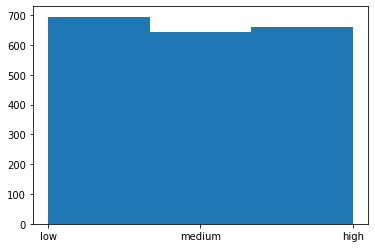

In [55]:
import matplotlib.pyplot as plt
plt.hist(df['bins'], bins=3)

In [56]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,bins
0,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850,low
1,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846,medium
2,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846,low
3,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846,low
4,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846,high


In [57]:
df = df.drop(columns='battery_power')

## part5-b

In [65]:
df.shape

(2000, 20)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [19])], remainder='passthrough')
df = np.array(ct.fit_transform(df))

In [67]:
print(df)

[[ 0.          1.          0.         ... -1.7864142  -1.00576657
   0.98585009]
 [ 0.          0.          1.         ...  0.5595007   0.99376936
  -1.01384583]
 [ 0.          1.          0.         ...  0.5595007   0.99376936
  -1.01384583]
 ...
 [ 1.          0.          0.         ...  0.5595007   0.99376936
  -1.01384583]
 [ 1.          0.          0.         ...  0.5595007   0.99376936
   0.98585009]
 [ 0.          1.          0.         ...  0.5595007   0.99376936
   0.98585009]]


## part6(svm model for part5-a,b )

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, y, test_size=0.4, random_state=0)

In [39]:
classification_reports(X_train1, y_train1, X_test1, y_test1, classifier2, target_names)

Confusion Matrix:  [[199   6   0   0]
 [ 13 167   7   0]
 [  0  10 181   8]
 [  0   0  13 196]]
Accuracy :  92.875
Report :                precision    recall  f1-score   support

     class 0       0.94      0.97      0.95       205
     class 1       0.91      0.89      0.90       187
     class 2       0.90      0.91      0.91       199
     class 3       0.96      0.94      0.95       209

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



## part5-c

### Quantile Transformer Scaler

In [74]:
df_scaled = X.copy()
col_names = X.columns
features = df_scaled[col_names]

In [75]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.244000,0.0,0.731231,0.000000,0.246747,0.000000,0.089590,0.599099,0.891892,0.182182,0.127127,0.014000,0.168000,0.618789,0.270270,0.642142,0.893894,0.000000,0.0,0.502002
1,0.360830,1.0,0.000000,0.503504,0.000000,0.539039,0.833333,0.686687,0.465966,0.305806,0.299299,0.727728,0.992492,0.643406,0.830330,0.322322,0.260761,0.616116,1.0,0.000000
2,0.045045,1.0,0.000000,0.503504,0.406907,0.539039,0.640641,0.860360,0.534535,0.552553,0.299299,0.894253,0.807000,0.634297,0.395395,0.233734,0.398899,0.616116,1.0,0.000000
3,0.085085,1.0,0.839339,0.000000,0.000000,0.000000,0.144645,0.797798,0.422422,0.685185,0.454955,0.875438,0.856857,0.680731,0.717217,0.706206,0.502503,0.616116,0.0,0.000000
4,0.879880,1.0,0.403403,0.000000,0.947948,0.539039,0.690691,0.599099,0.502503,0.182182,0.697197,0.869870,0.473473,0.312720,0.209710,0.233734,0.683684,0.616116,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.206206,1.0,0.000000,0.503504,0.000000,0.539039,0.000000,0.797798,0.227227,0.685185,0.697197,0.878000,0.918994,0.116390,0.538539,0.374875,0.893894,0.616116,1.0,0.000000
1996,0.971972,1.0,0.865365,0.503504,0.000000,0.000000,0.608108,0.212713,0.883383,0.435936,0.174675,0.732366,0.973000,0.469313,0.395395,0.790290,0.740741,0.616116,1.0,0.502002
1997,0.939940,0.0,0.318819,0.503504,0.246747,0.539039,0.569570,0.686687,0.241742,1.000000,0.174675,0.708709,0.749375,0.748249,0.270270,0.142142,0.180681,0.616116,1.0,0.000000
1998,0.676176,0.0,0.318819,0.000000,0.572072,0.539039,0.725726,0.000000,0.534535,0.552553,0.260260,0.302302,0.103604,0.167935,0.884885,0.790290,0.893894,0.616116,1.0,0.502002


## part6(svm model for part5-c)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_scaled, y, test_size=0.4, random_state=0)

In [ ]:
classification_reports(X_train2, y_train2, X_test2, y_test2, classifier, target_names)

Confusion Matrix:  [[174  31   0   0]
 [ 26 137  24   0]
 [  1  41 146  11]
 [  0   1  50 158]]
Accuracy :  76.875
Report :                precision    recall  f1-score   support

     class 0       0.87      0.85      0.86       205
     class 1       0.65      0.73      0.69       187
     class 2       0.66      0.73      0.70       199
     class 3       0.93      0.76      0.84       209

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



## part5-c

### Log Transform

In [ ]:
df3 = X.copy()

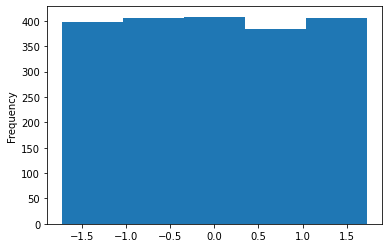

In [ ]:
df3['ram'].plot.hist(bins = 5)

In [ ]:
df3['ram'] = np.log(df3['ram'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


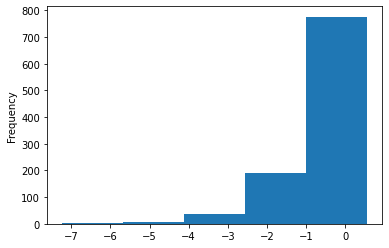

In [ ]:
df3['ram'].plot.hist(bins = 5)

## part6(svm model for part5-c)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3, y, test_size=0.4, random_state=0)

In [ ]:
#classification_reports(X_train3, y_train3, X_test3, y_test3, classifier, target_names)

## part5-d

In [59]:
df4 = X.copy()
df4['superficial'] = df4['px_height'] * df4['px_width']

In [60]:
df4 = df4.drop(columns = ['px_height', 'px_width'])

## part6(svm model for part5-d)

In [44]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4, y, test_size=0.4, random_state=0)

In [46]:
classification_reports(X_train4, y_train4, X_test4, y_test4, classifier2, target_names)

Confusion Matrix:  [[187  18   0   0]
 [ 19 145  23   0]
 [  0  28 145  26]
 [  0   0  27 182]]
Accuracy :  82.375
Report :                precision    recall  f1-score   support

     class 0       0.91      0.91      0.91       205
     class 1       0.76      0.78      0.77       187
     class 2       0.74      0.73      0.74       199
     class 3       0.88      0.87      0.87       209

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



## part6(svm for all of the changes in part5)

In [102]:
df5 = X.copy()
#Quantile Transformer Scaler
col_names = df5.columns
features = df5[col_names]
df5[col_names] = scaler.fit_transform(features.values)
#binning
df5['binned_battery_power'] = pd.cut(df5['battery_power'], bins=bins, labels=labels, include_lowest=True)
df5 = df5.drop(columns=['battery_power'])
#adding the "superficial" column
df5['superficial'] = df5['px_height'] * df5['px_width']
df5 = df5.drop(columns = ['px_height', 'px_width'])
#one hot encoding
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
df5 = np.array(ct2.fit_transform(df5))

In [104]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5, y, test_size=0.4, random_state=0)
classification_reports(X_train5, y_train5, X_test5, y_test5, classifier, target_names)

Confusion Matrix:  [[153  52   0   0]
 [ 30 122  34   1]
 [  0  55 126  18]
 [  0   1  56 152]]
Accuracy :  69.125
Report :                precision    recall  f1-score   support

     class 0       0.84      0.75      0.79       205
     class 1       0.53      0.65      0.59       187
     class 2       0.58      0.63      0.61       199
     class 3       0.89      0.73      0.80       209

    accuracy                           0.69       800
   macro avg       0.71      0.69      0.70       800
weighted avg       0.72      0.69      0.70       800



## part8-9

In [107]:
from sklearn.tree import DecisionTreeClassifier

### Train using Gini index

In [108]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
classification_reports(X_train, y_train, X_test, y_test, clf_gini, target_names)

Confusion Matrix:  [[166  39   0   0]
 [ 16 144  27   0]
 [  0  45 106  48]
 [  0   0  28 181]]
Accuracy :  74.625
Report :                precision    recall  f1-score   support

     class 0       0.91      0.81      0.86       205
     class 1       0.63      0.77      0.69       187
     class 2       0.66      0.53      0.59       199
     class 3       0.79      0.87      0.83       209

    accuracy                           0.75       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.75      0.74       800



In [ ]:
clf_gini2 = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=7, min_samples_leaf=5)
classification_reports(X_train, y_train, X_test, y_test, clf_gini2, target_names)

Confusion Matrix:  [[183  22   0   0]
 [ 19 149  19   0]
 [  0  25 151  23]
 [  0   0  21 188]]
Accuracy :  83.875
Report :                precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       205
     class 1       0.76      0.80      0.78       187
     class 2       0.79      0.76      0.77       199
     class 3       0.89      0.90      0.90       209

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



In [ ]:
clf_gini3 = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=100)
classification_reports(X_train, y_train, X_test, y_test, clf_gini3, target_names)

Confusion Matrix:  [[167  38   0   0]
 [ 26 134  27   0]
 [  0  45 122  32]
 [  0   0  46 163]]
Accuracy :  73.25
Report :                precision    recall  f1-score   support

     class 0       0.87      0.81      0.84       205
     class 1       0.62      0.72      0.66       187
     class 2       0.63      0.61      0.62       199
     class 3       0.84      0.78      0.81       209

    accuracy                           0.73       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.73      0.73       800



### Train using Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
classification_reports(X_train, y_train, X_test, y_test, clf_entropy, target_names)

Confusion Matrix:  [[167  38   0   0]
 [ 26 134  27   0]
 [  0  45 122  32]
 [  0   0  46 163]]
Accuracy :  73.25
Report :                precision    recall  f1-score   support

     class 0       0.87      0.81      0.84       205
     class 1       0.62      0.72      0.66       187
     class 2       0.63      0.61      0.62       199
     class 3       0.84      0.78      0.81       209

    accuracy                           0.73       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.73      0.73       800



### Visualizing the best decision tree

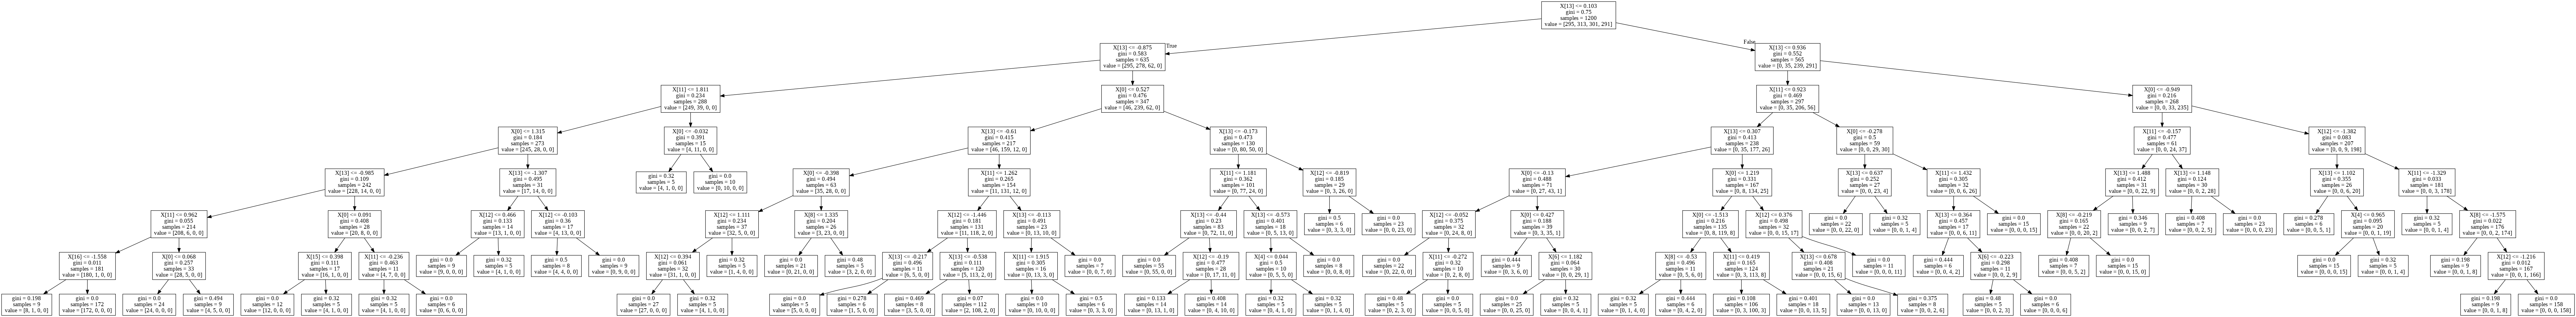

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini2, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

## part11

### pre-prunning

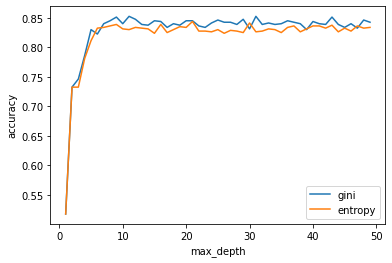

In [109]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,50):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, y_pred))
  
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, y_pred))
    
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [111]:
clf_gini4 = DecisionTreeClassifier(criterion="gini", max_depth=9)
classification_reports(X_train, y_train, X_test, y_test, clf_gini4, target_names)

Confusion Matrix:  [[187  18   0   0]
 [ 14 153  19   1]
 [  0  18 160  21]
 [  0   0  24 185]]
Accuracy :  85.625
Report :                precision    recall  f1-score   support

     class 0       0.93      0.91      0.92       205
     class 1       0.81      0.82      0.81       187
     class 2       0.79      0.80      0.80       199
     class 3       0.89      0.89      0.89       209

    accuracy                           0.86       800
   macro avg       0.86      0.85      0.86       800
weighted avg       0.86      0.86      0.86       800



### post-prunning
 

There are several post pruning techniques. We will use Cost complexity pruning.

In [ ]:
path = clf_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.03009936 0.03067814 0.04449638 0.05907401 0.18324782
 0.23682335 0.68167939]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

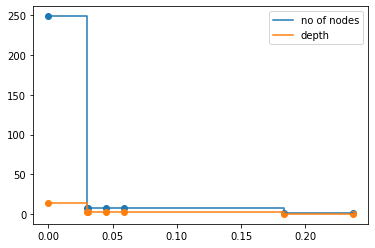

In [ ]:
#We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='no of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='depth', drawstyle="steps-post")
plt.legend()
plt.show()

 As alpha increases no of nodes and depth decreases

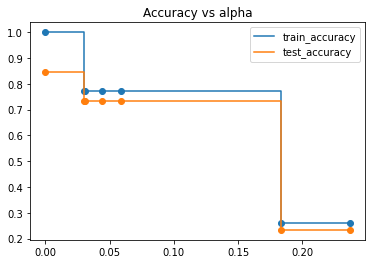

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.05

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
clf_.fit(X_train, y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train, y_train_pred)}')
print(f'Test score {accuracy_score(y_test, y_test_pred)}')

Train score 0.9008333333333334
Test score 0.82375


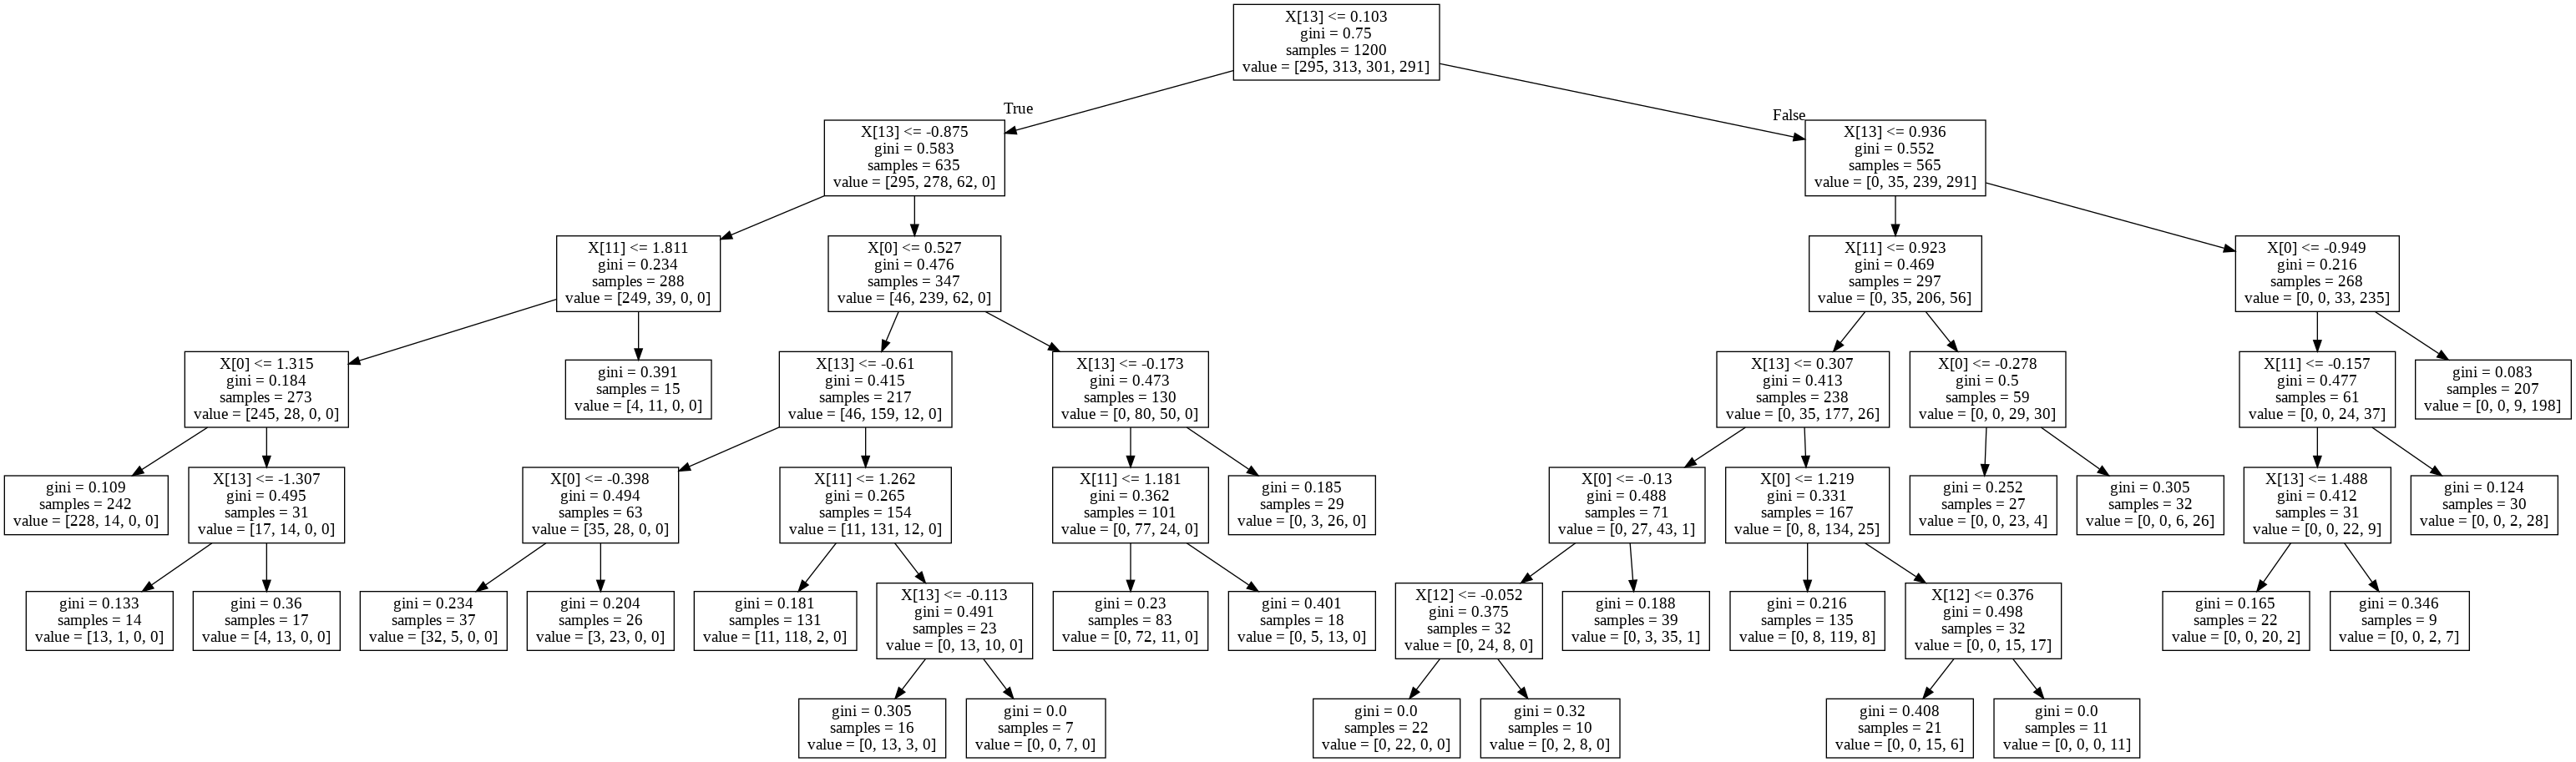

In [ ]:
dot_data = StringIO()
export_graphviz(clf_, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

## part12

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
classification_reports(X_train, y_train, X_test, y_test, rfc, target_names)

Confusion Matrix:  [[194  11   0   0]
 [ 15 147  25   0]
 [  0  32 151  16]
 [  0   0  15 194]]
Accuracy :  85.75
Report :                precision    recall  f1-score   support

     class 0       0.93      0.95      0.94       205
     class 1       0.77      0.79      0.78       187
     class 2       0.79      0.76      0.77       199
     class 3       0.92      0.93      0.93       209

    accuracy                           0.86       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.86      0.86      0.86       800

